# Client: Sales Effectiveness | Category: Product Sales Project Ref: PM-PR-0019

# Business Case:

--- FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads
generation channel is digital and through their website.

--- FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.
Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.

--- FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.

### PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low
Potential)




## Importing basic libraries

In [ ]:
!pip install mysql.connector

In [ ]:
import os
import mysql.connector

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read the file

In [ ]:
# connecting to database

connection = mysql.connector.connect(host='18.136.157.135',user='dm_team2',password='DM!$Team&27@9!20!',database='project_sales')

In [ ]:
query = "select * from data"
data = pd.read_sql(query, connection)

## Basic checks

In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [ ]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [ ]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [ ]:
data.shape

(7422, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [ ]:
data.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


## Target value counts

In [ ]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

## Removing duplicates

* there maybe a chance of containing duplicate rows. eliminating it.

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

              Created Product_ID   Source   Mobile    EMAIL     Sales_Agent  \
130  10-11-2018 20:27             Website  XXXXXXX  #VALUE!  Sales-Agent-10   
135  10-11-2018 20:17             Website  XXXXXXX  #VALUE!  Sales-Agent-10   

    Location Delivery_Mode Status  
130                 Mode-5   Open  
135                 Mode-5   Open  


In [ ]:
print("No. of duplicate values: ", duplicates.shape[0])

No. of duplicate values:  2


In [ ]:
data = data.drop_duplicates()
data.shape

(7420, 9)

## EDA

### Univariate analysis

In [ ]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

#### Product_ID

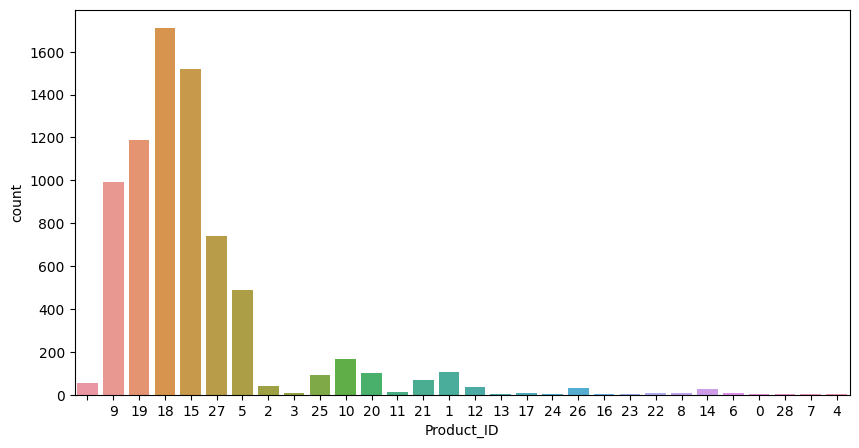

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product_ID', data=data)
plt.show()

#### **Observation of Product_ID**
* Products classified as 9,19,18,15,27,5 are of high selling while other all products are of low selling.

#### Source

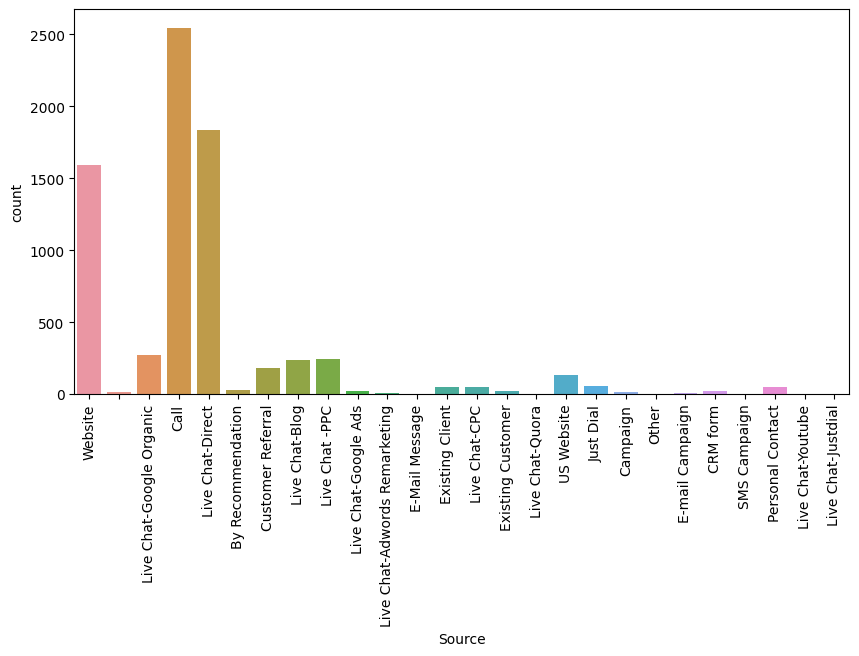

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Source', data=data)
plt.xticks(rotation=90)
plt.show()

#### **Observation of Source**
* Website, Call and Live chat-direct are the sources which helped more in sales.

#### Sales Agent

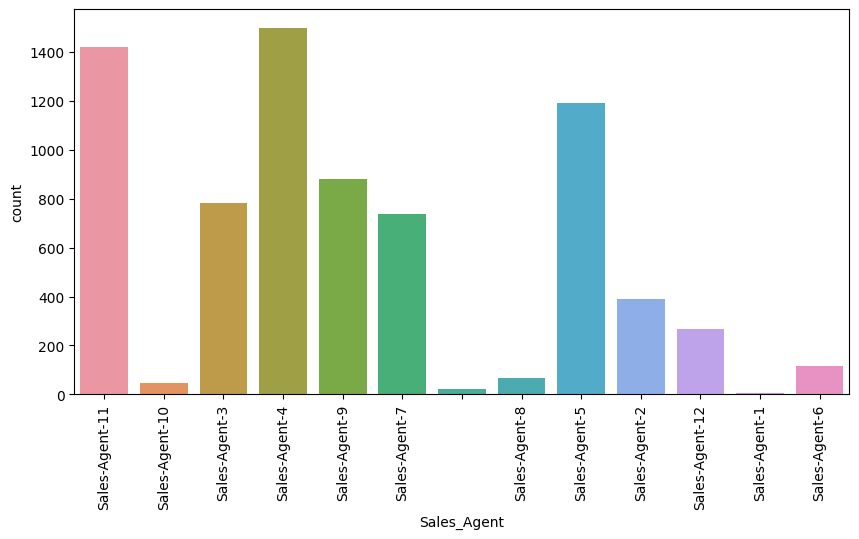

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sales_Agent', data=data)
plt.xticks(rotation=90)
plt.show()

#### **Observation of Sales agent**
* Agent number 3,4,5,7,9 and 11 are performing well in sales compared to others.

#### Location

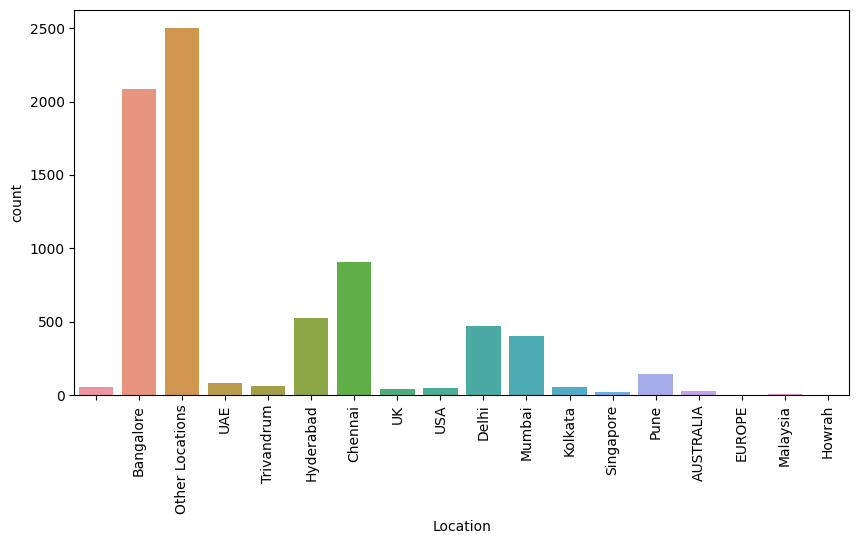

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Location', data=data)
plt.xticks(rotation=90)
plt.show()

#### **Observation of Location**
* Here Banglore and Other Locations are having very rate of sales while Chennai is having an average. Hyderabad, Delhi and Mumbai are having sales a bit more low than the average while other all places are having very poor sales.

#### Delivery_Mode

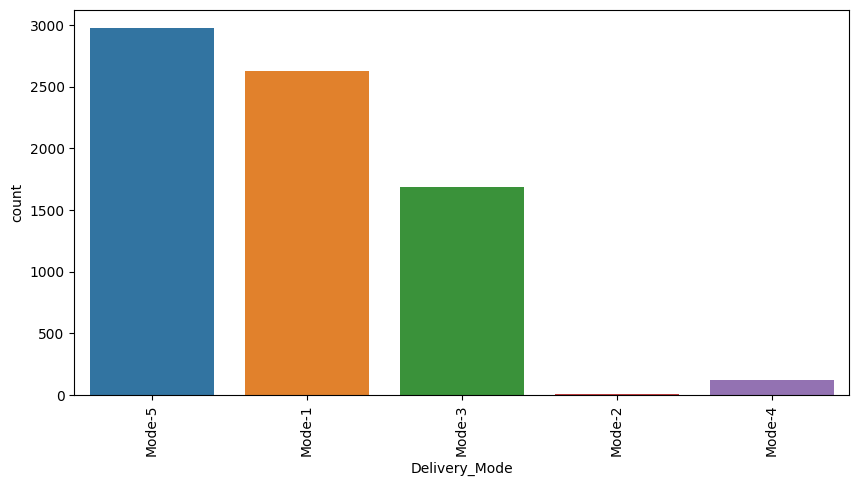

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Delivery_Mode', data=data)
plt.xticks(rotation=90)
plt.show()

#### **Observation of Delivery Mode**
* Two modes are more in use for sales which are Mode 1 and 5. Mode 3 is of average use in sales whiile Other two modes are very rarely used.

#### Status

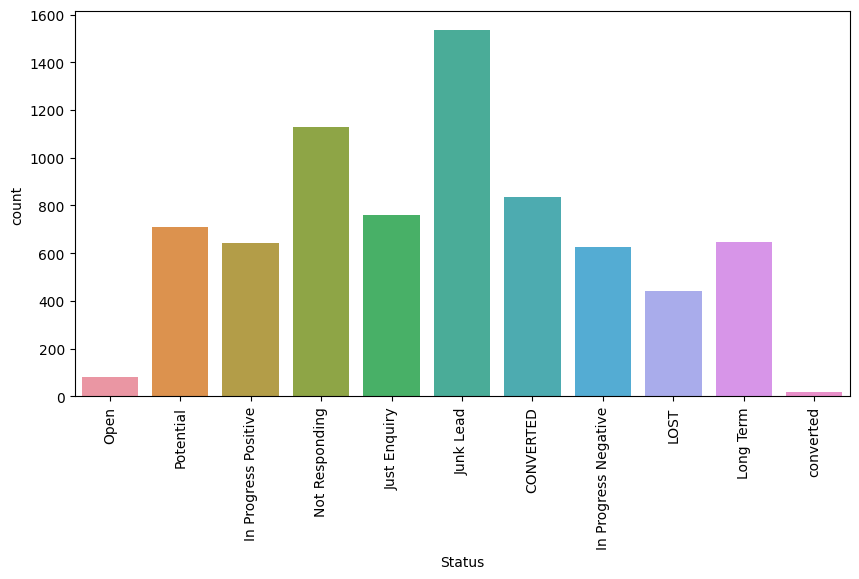

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Status', data=data)
plt.xticks(rotation=90)
plt.show()

#### **Observation of Status**
* It shows that most of the leads turn out to be junk leads and many are not responding. Leads by Just enquiry, CONVERTED, In Progress+, In Progress-, Potential, Long term and Lost are having a small difference in each other.

#### **Overall Observation of Status**
* Low potential leads are more in number than high potential leads.

## Data Preprocessing

In [ ]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

### Handling missing values
* since we have seen some blank values.

In [ ]:
## replacing blank values into NaN value

data.replace('', np.nan, inplace=True)
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

In [ ]:
## finding mode of all columns since all are object type

for i in data:
  if data[i].dtype == 'object': # to detect the column with object dtype
    print(f'mode of {i} -----> {data[i].mode()[0]}')
    print('==============================')

mode of Created -----> 10-05-2018 12:30
mode of Product_ID -----> 18
mode of Source -----> Call
mode of Mobile -----> XXXXXXX
mode of EMAIL -----> #VALUE!
mode of Sales_Agent -----> Sales-Agent-4
mode of Location -----> Other Locations
mode of Delivery_Mode -----> Mode-5
mode of Status -----> Junk Lead


In [ ]:
## replacing the mode values into the NaN values

for i in data:
  if data[i].dtype == 'object':
    data.loc[data[i].isnull()==True, i] = data[i].mode()[0] # will replace NaN of selected columns into mode values of respective columns

In [ ]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

## Feature Engineering

In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open


#### Grouping the data

In [ ]:
## grouping Product_ID column

data.Product_ID.value_counts()

18    1767
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [ ]:
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'], 'min_sold', inplace=True) # group the min sold as min sold
data.Product_ID.value_counts()

18          1767
15          1518
19          1189
9            992
27           739
5            487
10           168
1            105
20           102
25            90
21            66
min_sold      65
2             38
12            36
26            31
14            27
Name: Product_ID, dtype: int64

In [ ]:
## grouping source column

data.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [ ]:
data.Source.replace(['Live Chat-Google Organic', 'Live Chat-Direct', 'Live Chat-Blog',
                    'Live Chat -PPC', 'Live Chat-Google Ads', 'Live Chat-Adwords Remarketing',
                    'Live Chat-CPC', 'Live Chat-Quora', 'Live Chat-Youtube', 'Live Chat-Justdial'], 'Live Chat', inplace=True) # group as live chat

In [ ]:
data.Source.replace(['By Recommendation', 'Customer Referral'], 'Recommendation', inplace=True) # group as recommendation

In [ ]:
data.Source.replace(['US Website'], 'Website', inplace=True) # group with already existing website

In [ ]:
data.Source.replace(['Existing Client', 'Existing Customer', 'Personal Contact', 'CRM form'], 'Client', inplace=True) # group as client

In [ ]:
data.Source.replace(['SMS Campaign', 'E-mail Campaign', 'E-Mail Message'], 'Campaign', inplace=True) # group with already existing campaign

In [ ]:
data.Source.replace(['Just Dial'], 'Call', inplace=True) # group with already existing call

In [ ]:
data.Source.value_counts()

Live Chat         2677
Call              2620
Website           1729
Recommendation     212
Client             146
Campaign            34
Other                2
Name: Source, dtype: int64

In [ ]:
## grouping location column

data.Location.value_counts()

Other Locations    2556
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [ ]:
data.Location.replace(['AUSTRALIA', 'EUROPE', 'UK', 'USA'], 'West', inplace=True)

In [ ]:
data.Location.replace(['Singapore', 'Malaysia', 'UAE'], 'Asia', inplace=True)

In [ ]:
data.Location.replace(['Trivandrum', 'Kolkata', 'Howrah'], 'Other Locations', inplace=True) # gropu with already existing other locations

In [ ]:
data.Location.value_counts()

Other Locations    2670
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
West                114
Asia                100
Name: Location, dtype: int64

In [ ]:
## grouping status column as high potential and low potential

data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: Status, dtype: int64

In [ ]:
# group as low potential by negative status
data.Status.replace(['Junk Lead', 'Not Responding', 'In Progress Negative', 'LOST', 'Just Enquiry'], 'low potential', inplace=True)

# group as high potential by positive status
data.Status.replace(['CONVERTED', 'Potential', 'Long Term', 'In Progress Positive', 'converted', 'Open'], 'high potential', inplace=True)

In [ ]:
data.Status.value_counts()

low potential     4491
high potential    2929
Name: Status, dtype: int64

In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,high potential
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,high potential
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,high potential
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,high potential
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,high potential


#### Dropping unwanted columns

In [ ]:
data.drop(['Created', 'Mobile', 'EMAIL'], axis=1, inplace=True)
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,high potential
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,high potential
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,high potential
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,high potential
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,high potential


#### Encoding the data manually

* manually labeling the chategorical columns with the top 10 value counts

In [ ]:
## label min sold as 0

data.Product_ID.replace('min_sold', 0, inplace=True)

In [ ]:
data.Product_ID.value_counts()

18    1767
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
0       65
2       38
12      36
26      31
14      27
Name: Product_ID, dtype: int64

In [ ]:
for col in data.columns:
  print(col, ':', len(data[col].unique()), 'labels')

Product_ID : 16 labels
Source : 7 labels
Sales_Agent : 12 labels
Location : 9 labels
Delivery_Mode : 5 labels
Status : 2 labels


#### Product_ID

In [ ]:
data.dtypes

Product_ID       object
Source           object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [ ]:
data['Product_ID'] = data['Product_ID'].astype(int)

In [ ]:
data.dtypes

Product_ID        int64
Source           object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [ ]:
data.Product_ID.value_counts().sort_values(ascending=False)

18    1767
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
0       65
2       38
12      36
26      31
14      27
Name: Product_ID, dtype: int64

In [ ]:
## selecting the top 10 value counts

top_10 = [x for x in data.Product_ID.value_counts().sort_values(ascending=False).head(10).index]
top_10

[18, 15, 19, 9, 27, 5, 10, 1, 20, 25]

In [ ]:
for label in top_10:
  data[label] = np.where(data['Product_ID'] == label,1,0)

data[['Product_ID']+top_10].head(50)

,Product_ID,18,15,19,9,27,5,10,1,20,25
0,18,1,0,0,0,0,0,0,0,0,0
1,18,1,0,0,0,0,0,0,0,0,0
2,18,1,0,0,0,0,0,0,0,0,0
3,18,1,0,0,0,0,0,0,0,0,0
4,18,1,0,0,0,0,0,0,0,0,0
5,18,1,0,0,0,0,0,0,0,0,0
6,18,1,0,0,0,0,0,0,0,0,0
7,18,1,0,0,0,0,0,0,0,0,0
8,18,1,0,0,0,0,0,0,0,0,0
9,18,1,0,0,0,0,0,0,0,0,0


#### Source

In [ ]:
data.Source.value_counts().sort_values(ascending=False)

Live Chat         2677
Call              2620
Website           1729
Recommendation     212
Client             146
Campaign            34
Other                2
Name: Source, dtype: int64

In [ ]:
## selecting the top 10 value counts

top_10 = [x for x in data.Source.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Live Chat',
 'Call',
 'Website',
 'Recommendation',
 'Client',
 'Campaign',
 'Other']

In [ ]:
for label in top_10:
  data[label] = np.where(data['Source'] == label,1,0)

data[['Source']+top_10].head(50)

,Source,Live Chat,Call,Website,Recommendation,Client,Campaign,Other
0,Website,0,0,1,0,0,0,0
1,Website,0,0,1,0,0,0,0
2,Website,0,0,1,0,0,0,0
3,Website,0,0,1,0,0,0,0
4,Website,0,0,1,0,0,0,0
5,Website,0,0,1,0,0,0,0
6,Website,0,0,1,0,0,0,0
7,Website,0,0,1,0,0,0,0
8,Website,0,0,1,0,0,0,0
9,Website,0,0,1,0,0,0,0


#### Sales Agent

In [ ]:
data.Sales_Agent.value_counts().sort_values(ascending=False)

Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [ ]:
top_10 = [x for x in data.Sales_Agent.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Sales-Agent-4',
 'Sales-Agent-11',
 'Sales-Agent-5',
 'Sales-Agent-9',
 'Sales-Agent-3',
 'Sales-Agent-7',
 'Sales-Agent-2',
 'Sales-Agent-12',
 'Sales-Agent-6',
 'Sales-Agent-8']

In [ ]:
for label in top_10:
  data[label] = np.where(data['Sales_Agent'] == label,1,0)

data[['Sales_Agent']+top_10].head(50)

,Sales_Agent,Sales-Agent-4,Sales-Agent-11,Sales-Agent-5,Sales-Agent-9,Sales-Agent-3,Sales-Agent-7,Sales-Agent-2,Sales-Agent-12,Sales-Agent-6,Sales-Agent-8
0,Sales-Agent-11,0,1,0,0,0,0,0,0,0,0
1,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
2,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
3,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
4,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
5,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
6,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
7,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
8,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0
9,Sales-Agent-10,0,0,0,0,0,0,0,0,0,0


#### Location

In [ ]:
data.Location.value_counts().sort_values(ascending=False)

Other Locations    2670
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
West                114
Asia                100
Name: Location, dtype: int64

In [ ]:
top_10 = [x for x in data.Location.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Other Locations',
 'Bangalore',
 'Chennai',
 'Hyderabad',
 'Delhi',
 'Mumbai',
 'Pune',
 'West',
 'Asia']

In [ ]:
for label in top_10:
  data[label] = np.where(data['Location'] == label,1,0)

data[['Location']+top_10].head(50)

,Location,Other Locations,Bangalore,Chennai,Hyderabad,Delhi,Mumbai,Pune,West,Asia
0,Other Locations,1,0,0,0,0,0,0,0,0
1,Other Locations,1,0,0,0,0,0,0,0,0
2,Other Locations,1,0,0,0,0,0,0,0,0
3,Other Locations,1,0,0,0,0,0,0,0,0
4,Other Locations,1,0,0,0,0,0,0,0,0
5,Other Locations,1,0,0,0,0,0,0,0,0
6,Other Locations,1,0,0,0,0,0,0,0,0
7,Other Locations,1,0,0,0,0,0,0,0,0
8,Other Locations,1,0,0,0,0,0,0,0,0
9,Other Locations,1,0,0,0,0,0,0,0,0


#### Delivery mode

In [ ]:
data.Delivery_Mode.value_counts().sort_values(ascending=False)

Mode-5    2973
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [ ]:
top_10 = [x for x in data.Delivery_Mode.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Mode-5', 'Mode-1', 'Mode-3', 'Mode-4', 'Mode-2']

In [ ]:
for label in top_10:
  data[label] = np.where(data['Delivery_Mode'] == label,1,0)

data[['Delivery_Mode']+top_10].head(50)

,Delivery_Mode,Mode-5,Mode-1,Mode-3,Mode-4,Mode-2
0,Mode-5,1,0,0,0,0
1,Mode-5,1,0,0,0,0
2,Mode-5,1,0,0,0,0
3,Mode-5,1,0,0,0,0
4,Mode-5,1,0,0,0,0
5,Mode-5,1,0,0,0,0
6,Mode-5,1,0,0,0,0
7,Mode-5,1,0,0,0,0
8,Mode-5,1,0,0,0,0
9,Mode-5,1,0,0,0,0


#### Status

In [ ]:
data.Status.value_counts()

low potential     4491
high potential    2929
Name: Status, dtype: int64

In [ ]:
data.Status = data.Status.map({'low potential':0, 'high potential':1})

In [ ]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,18,15,19,9,...,Delhi,Mumbai,Pune,West,Asia,Mode-5,Mode-1,Mode-3,Mode-4,Mode-2
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.columns

Index([     'Product_ID',          'Source',     'Sales_Agent',
              'Location',   'Delivery_Mode',          'Status',
                      18,                15,                19,
                       9,                27,                 5,
                      10,                 1,                20,
                      25,       'Live Chat',            'Call',
               'Website',  'Recommendation',          'Client',
              'Campaign',           'Other',   'Sales-Agent-4',
        'Sales-Agent-11',   'Sales-Agent-5',   'Sales-Agent-9',
         'Sales-Agent-3',   'Sales-Agent-7',   'Sales-Agent-2',
        'Sales-Agent-12',   'Sales-Agent-6',   'Sales-Agent-8',
       'Other Locations',       'Bangalore',         'Chennai',
             'Hyderabad',           'Delhi',          'Mumbai',
                  'Pune',            'West',            'Asia',
                'Mode-5',          'Mode-1',          'Mode-3',
                'Mode-4',          'Mode

In [ ]:
data.shape

(7420, 47)

### Dropping the unwanted columns

In [ ]:
 # since we have encoded all the values into either 0 or 1, we no longer needed a special column for each category.

data.drop(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode'], axis=1, inplace=True)
data.head()

,Status,18,15,19,9,27,5,10,1,20,...,Delhi,Mumbai,Pune,West,Asia,Mode-5,Mode-1,Mode-3,Mode-4,Mode-2
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.columns

Index([         'Status',                18,                15,
                      19,                 9,                27,
                       5,                10,                 1,
                      20,                25,       'Live Chat',
                  'Call',         'Website',  'Recommendation',
                'Client',        'Campaign',           'Other',
         'Sales-Agent-4',  'Sales-Agent-11',   'Sales-Agent-5',
         'Sales-Agent-9',   'Sales-Agent-3',   'Sales-Agent-7',
         'Sales-Agent-2',  'Sales-Agent-12',   'Sales-Agent-6',
         'Sales-Agent-8', 'Other Locations',       'Bangalore',
               'Chennai',       'Hyderabad',           'Delhi',
                'Mumbai',            'Pune',            'West',
                  'Asia',          'Mode-5',          'Mode-1',
                'Mode-3',          'Mode-4',          'Mode-2'],
      dtype='object')

In [ ]:
data.shape

(7420, 42)

## Feature selection

In [ ]:
data.corr()

,Status,18,15,19,9,27,5,10,1,20,...,Delhi,Mumbai,Pune,West,Asia,Mode-5,Mode-1,Mode-3,Mode-4,Mode-2
Status,1.000000,0.122011,-0.342584,0.143297,0.082163,0.037091,-0.038123,0.055017,-0.050068,0.046735,...,-0.023662,-0.020325,-0.022245,0.013448,0.029951,-0.210193,0.172970,0.024120,0.074530,0.019047
18,0.122011,1.000000,-0.283540,-0.244225,-0.219633,-0.185943,-0.148178,-0.085095,-0.066983,-0.066006,...,0.028337,0.015749,0.005044,-0.000381,0.022463,-0.092971,0.089588,0.025676,-0.059494,-0.013319
15,-0.342584,-0.283540,1.000000,-0.221538,-0.199230,-0.168670,-0.134413,-0.077190,-0.060761,-0.059874,...,-0.097778,-0.100717,-0.039139,-0.047053,-0.041892,0.417091,-0.258791,-0.176392,-0.049471,-0.010858
19,0.143297,-0.244225,-0.221538,1.000000,-0.171605,-0.145283,-0.115775,-0.066487,-0.052336,-0.051572,...,0.076133,0.093455,0.006022,0.052967,-0.000077,-0.127754,0.065334,0.074940,-0.001129,0.002266
9,0.082163,-0.219633,-0.199230,-0.171605,1.000000,-0.130653,-0.104117,-0.059792,-0.047066,-0.046379,...,0.042279,0.040683,-0.011516,-0.000776,0.002166,-0.121597,0.063588,0.040929,0.090121,0.015742
27,0.037091,-0.185943,-0.168670,-0.145283,-0.130653,1.000000,-0.088147,-0.050621,-0.039846,-0.039265,...,-0.040441,-0.027908,0.009386,-0.015931,0.007964,-0.070806,0.021045,0.066434,-0.021502,-0.012815
5,-0.038123,-0.148178,-0.134413,-0.115775,-0.104117,-0.088147,1.000000,-0.040339,-0.031753,-0.031290,...,-0.017663,-0.005733,0.022562,0.019990,-0.007379,-0.040123,0.029111,0.021045,-0.021234,-0.010212
10,0.055017,-0.085095,-0.077190,-0.066487,-0.059792,-0.050621,-0.040339,1.000000,-0.018235,-0.017969,...,0.016111,-0.000408,0.018415,-0.019012,0.029353,-0.026462,0.008564,-0.011279,0.080547,0.088325
1,-0.050068,-0.066983,-0.060761,-0.052336,-0.047066,-0.039846,-0.031753,-0.018235,1.000000,-0.014145,...,-0.021832,-0.008512,-0.000079,-0.014966,-0.014003,-0.011807,0.035373,-0.021467,-0.015426,-0.004616
20,0.046735,-0.066006,-0.059874,-0.051572,-0.046379,-0.039265,-0.031290,-0.017969,-0.014145,1.000000,...,0.007241,0.007536,0.000405,0.022895,0.016315,-0.020948,-0.014794,0.027046,0.048770,-0.004549


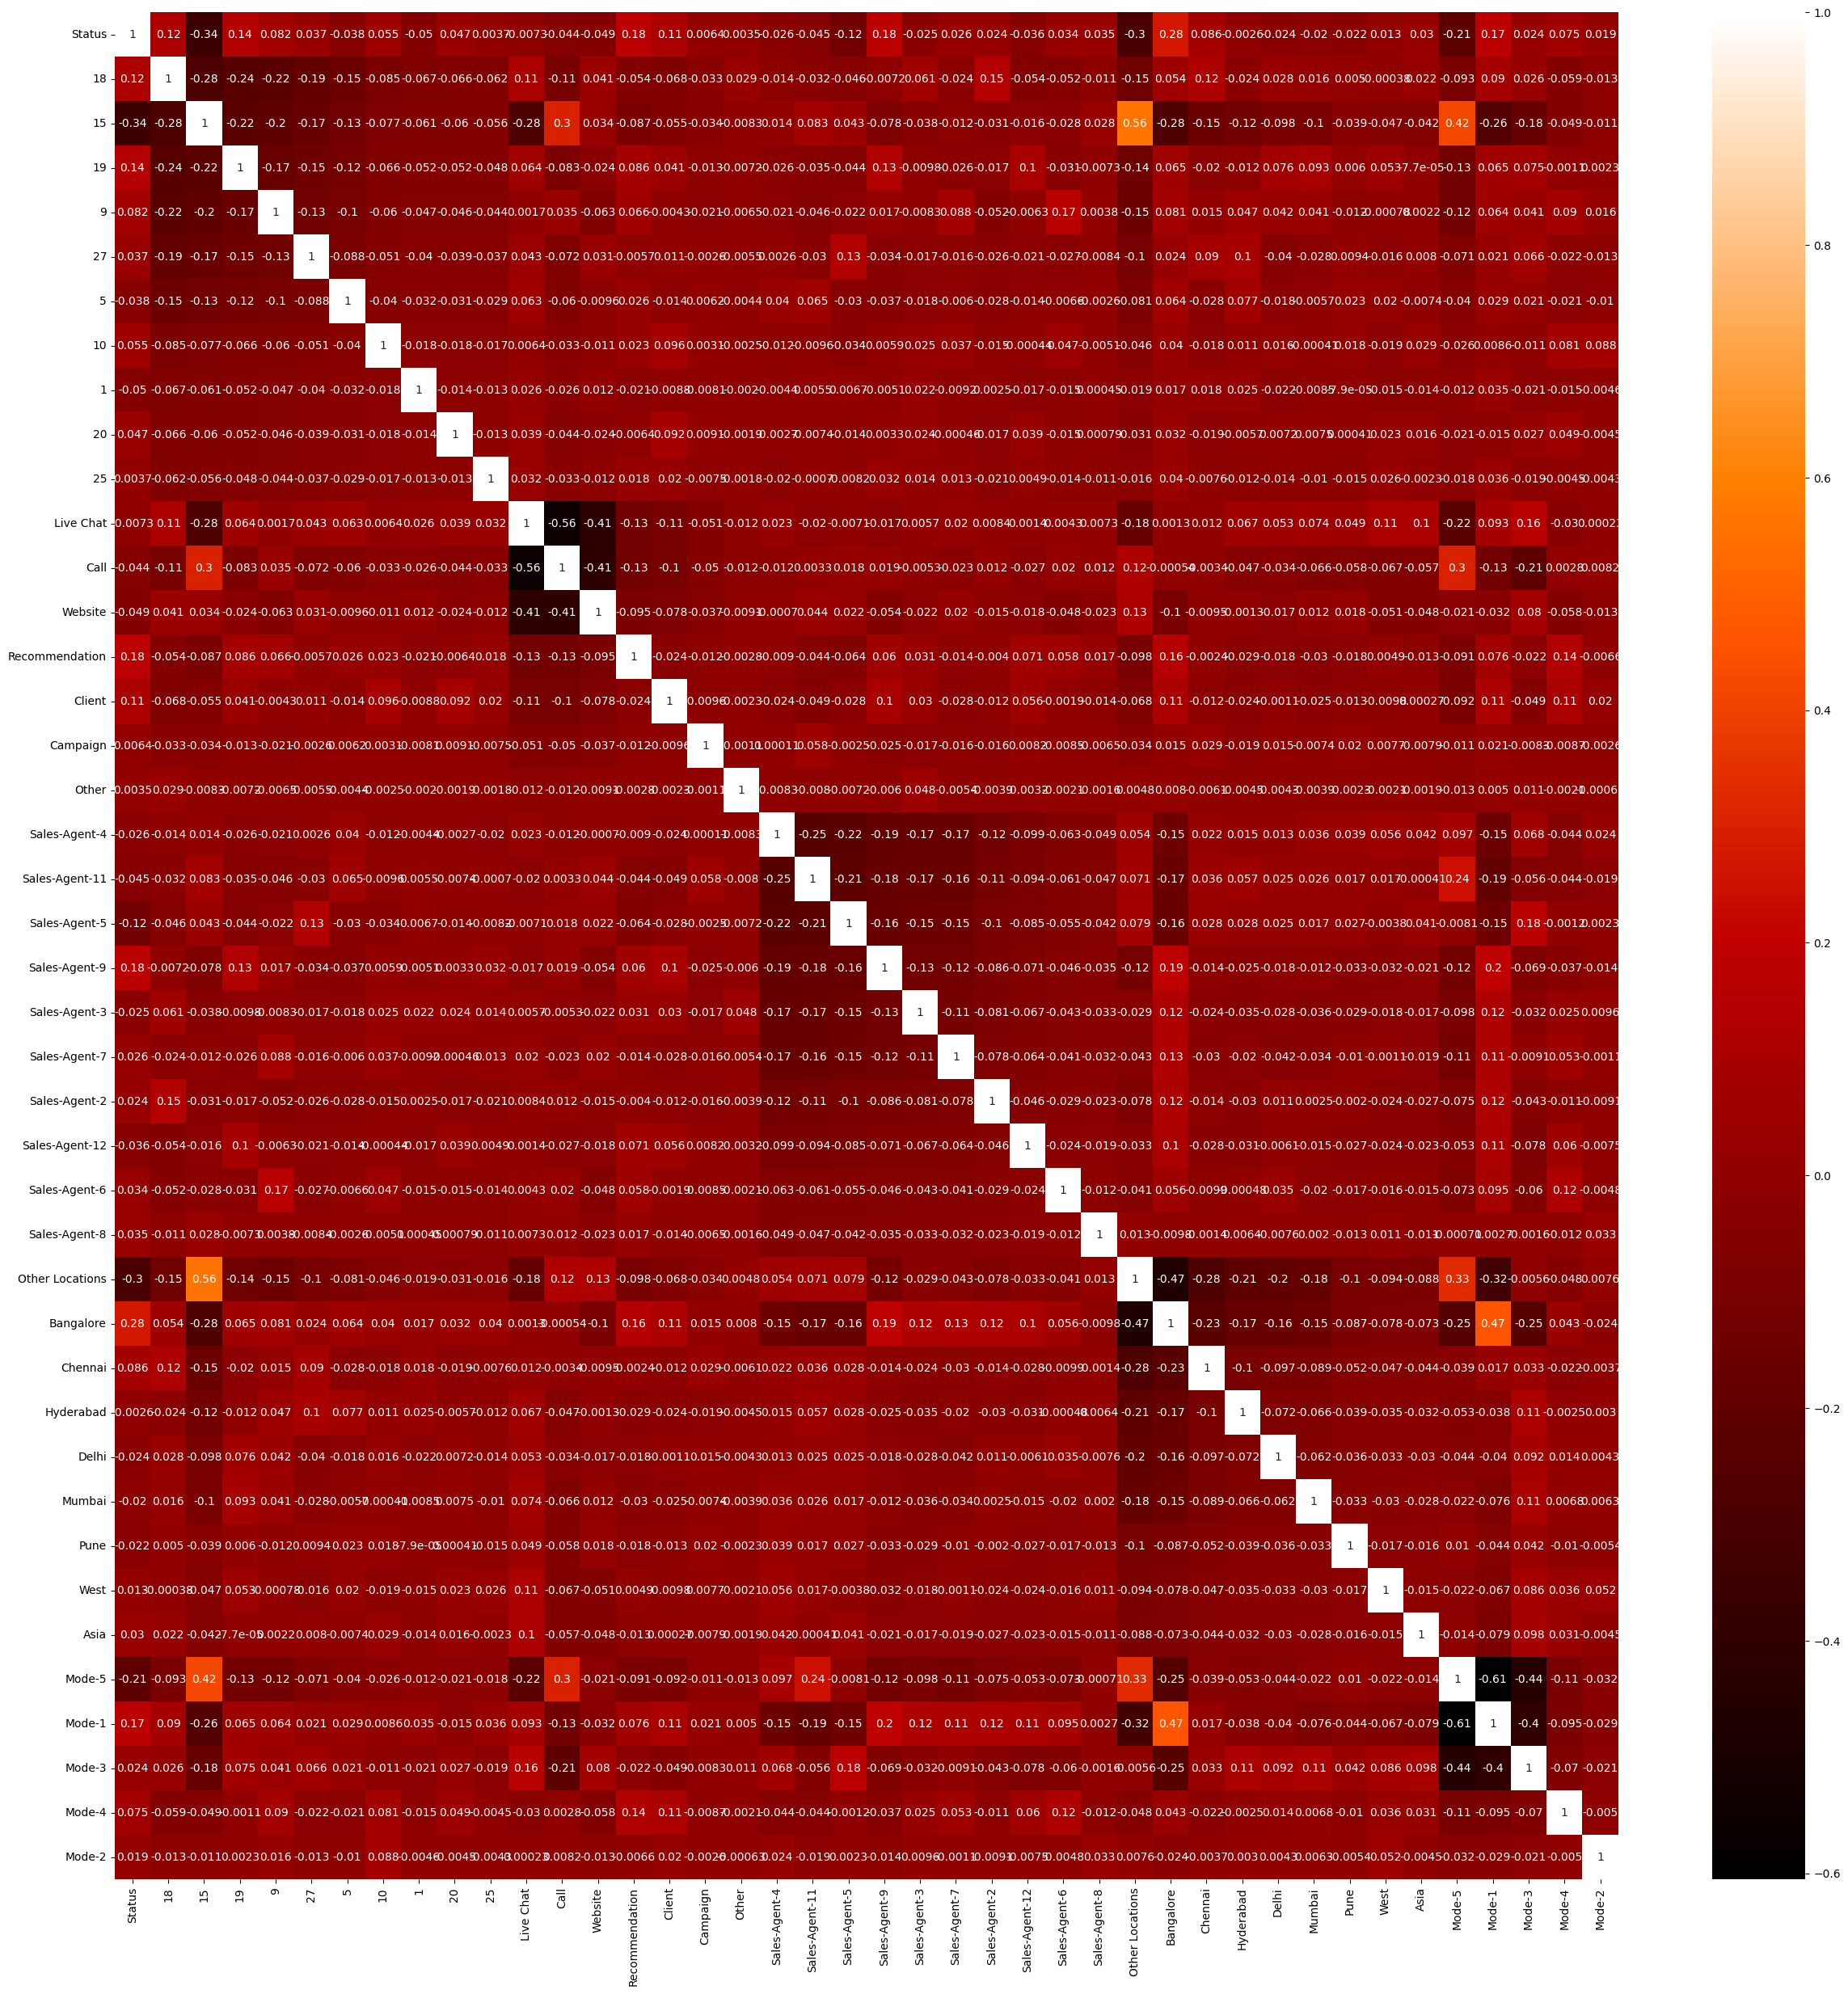

In [ ]:
# now using heat map

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='gist_heat')
plt.show()

## Model Preparation

### splitting of x and y

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, :1]

In [ ]:
X.head()

,18,15,19,9,27,5,10,1,20,25,...,Delhi,Mumbai,Pune,West,Asia,Mode-5,Mode-1,Mode-3,Mode-4,Mode-2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(7420, 41)

In [ ]:
X.columns

Index([               18,                15,                19,
                       9,                27,                 5,
                      10,                 1,                20,
                      25,       'Live Chat',            'Call',
               'Website',  'Recommendation',          'Client',
              'Campaign',           'Other',   'Sales-Agent-4',
        'Sales-Agent-11',   'Sales-Agent-5',   'Sales-Agent-9',
         'Sales-Agent-3',   'Sales-Agent-7',   'Sales-Agent-2',
        'Sales-Agent-12',   'Sales-Agent-6',   'Sales-Agent-8',
       'Other Locations',       'Bangalore',         'Chennai',
             'Hyderabad',           'Delhi',          'Mumbai',
                  'Pune',            'West',            'Asia',
                'Mode-5',          'Mode-1',          'Mode-3',
                'Mode-4',          'Mode-2'],
      dtype='object')

In [ ]:
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.value_counts()

Status
0         4491
1         2929
dtype: int64

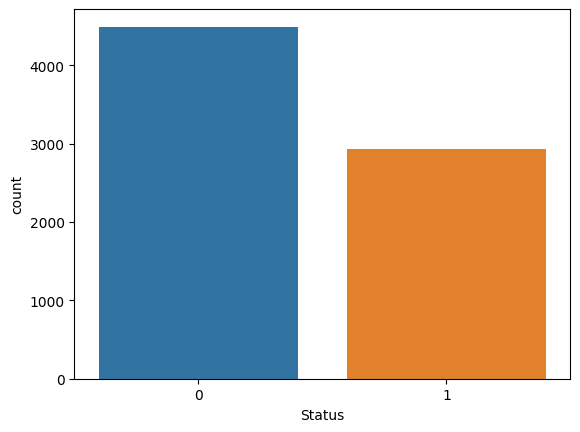

In [ ]:
sns.countplot(x=data.Status)
plt.show()

### Balancing the data

* as we can see, there is a big difference between the value count of status. we need to balance it for model to learn more efficeintly



#### SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X.columns = X.columns.astype(str)
X_sm, y_sm = sm.fit_resample(X, y)

print('actual counts :', Counter(y.Status))
print('smotes counts :', Counter(y_sm.Status))

actual counts : Counter({0: 4491, 1: 2929})
smotes counts : Counter({1: 4491, 0: 4491})


## Splitting of training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7185, 41)
(1797, 41)
(7185, 1)
(1797, 1)


## Scaling of data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model creation

#### **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('metrics on test data of Logistic Regression \n')

lr_accuracy = accuracy_score(y_test, lr_pred)

print('accuracy score :', lr_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, lr_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, lr_pred))

metrics on test data of Logistic Regression 

accuracy score : 0.7278797996661102


confusion matrix : 

 [[637 255]
 [234 671]]


classification report : 

               precision    recall  f1-score   support

           0       0.73      0.71      0.72       892
           1       0.72      0.74      0.73       905

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

#### Evaluation

In [ ]:
print('metrics on test data of Decision Tree \n')

dt_accuracy = accuracy_score(y_test, dt_pred)

print('accuracy score :', dt_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, dt_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, dt_pred))

metrics on test data of Decision Tree 

accuracy score : 0.7328881469115192


confusion matrix : 

 [[659 233]
 [247 658]]


classification report : 

               precision    recall  f1-score   support

           0       0.73      0.74      0.73       892
           1       0.74      0.73      0.73       905

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#### Evaluation

In [ ]:
print('metrics on test data of Random Forest \n')

rf_accuracy = accuracy_score(y_test, rf_pred)

print('accuracy score :', rf_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, rf_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, rf_pred))

metrics on test data of Random Forest 

accuracy score : 0.7423483583750695


confusion matrix : 

 [[625 267]
 [196 709]]


classification report : 

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       892
           1       0.73      0.78      0.75       905

    accuracy                           0.74      1797
   macro avg       0.74      0.74      0.74      1797
weighted avg       0.74      0.74      0.74      1797



#### **Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

#### Evaluation

In [ ]:
print('metrics on test data of Gradient Boosting \n')

gb_accuracy = accuracy_score(y_test, gb_pred)

print('accuracy score :', gb_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, gb_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, gb_pred))

metrics on test data of Gradient Boosting 

accuracy score : 0.7306622148024485


confusion matrix : 

 [[605 287]
 [197 708]]


classification report : 

               precision    recall  f1-score   support

           0       0.75      0.68      0.71       892
           1       0.71      0.78      0.75       905

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



#### **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [ ]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

#### Evaluation

In [ ]:
print('metrics on test data of XGB Classifier \n')

xgb_accuracy = accuracy_score(y_test, xgb_pred)

print('accuracy score :', xgb_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, xgb_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, xgb_pred))

metrics on test data of XGB Classifier 

accuracy score : 0.7545909849749582


confusion matrix : 

 [[646 246]
 [195 710]]


classification report : 

               precision    recall  f1-score   support

           0       0.77      0.72      0.75       892
           1       0.74      0.78      0.76       905

    accuracy                           0.75      1797
   macro avg       0.76      0.75      0.75      1797
weighted avg       0.76      0.75      0.75      1797



#### **SVC**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()

In [ ]:
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

#### Evaluation

In [ ]:
print('metrics on test data of SVC \n')

svc_accuracy = accuracy_score(y_test, svc_pred)

print('accuracy score :', svc_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, svc_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, svc_pred))

metrics on test data of SVC 

accuracy score : 0.7562604340567612


confusion matrix : 

 [[671 221]
 [217 688]]


classification report : 

               precision    recall  f1-score   support

           0       0.76      0.75      0.75       892
           1       0.76      0.76      0.76       905

    accuracy                           0.76      1797
   macro avg       0.76      0.76      0.76      1797
weighted avg       0.76      0.76      0.76      1797



#### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,25):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train)
  knn_pred = knn_model.predict(X_test)
  error_rate.append(np.mean(np.expand_dims(knn_pred, axis=1)!=y_test))
  error_rate

Text(0, 0.5, 'error rate')

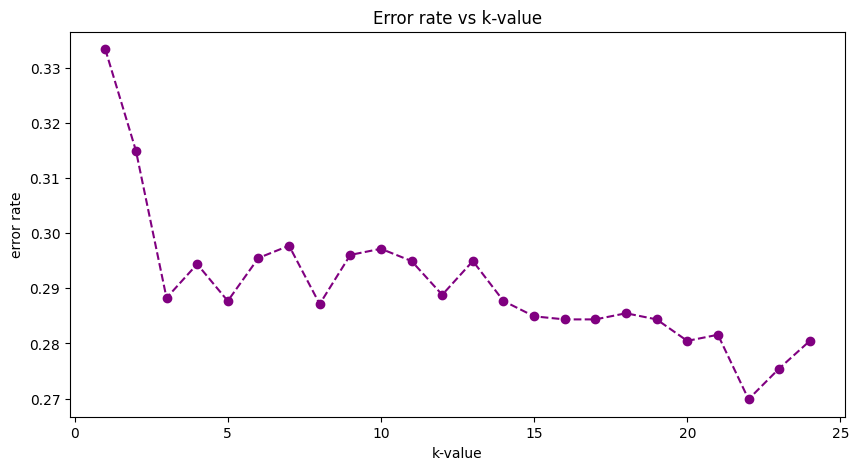

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,25), error_rate, color='purple', linestyle='--', marker='o', markersize=6)
plt.title('Error rate vs k-value')
plt.xlabel('k-value')
plt.ylabel('error rate')

In [115]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
knn_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

#### Evaluation

In [117]:
print('metrics on test data of KNN \n')

knn_accuracy = accuracy_score(y_test, knn_pred)

print('accuracy score :', knn_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, knn_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, knn_pred))

metrics on test data of KNN 

accuracy score : 0.7195325542570952


confusion matrix : 

 [[587 305]
 [199 706]]


classification report : 

               precision    recall  f1-score   support

           0       0.75      0.66      0.70       892
           1       0.70      0.78      0.74       905

    accuracy                           0.72      1797
   macro avg       0.72      0.72      0.72      1797
weighted avg       0.72      0.72      0.72      1797



#### **Bagging**

In [119]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=rf_model)

In [122]:
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)

#### Evaluation

In [123]:
print('metrics on test data of Bagging \n')

bag_accuracy = accuracy_score(y_test, bag_pred)

print('accuracy score :', bag_accuracy)
print('\n')
print('confusion matrix : \n\n', confusion_matrix(y_test, bag_pred))
print('\n')
print('classification report : \n\n', classification_report(y_test, bag_pred))

metrics on test data of Bagging 

accuracy score : 0.7440178074568725


confusion matrix : 

 [[624 268]
 [192 713]]


classification report : 

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       892
           1       0.73      0.79      0.76       905

    accuracy                           0.74      1797
   macro avg       0.75      0.74      0.74      1797
weighted avg       0.75      0.74      0.74      1797



## All Method Accuracy

In [124]:
## defining variables
scores = [lr_accuracy,knn_accuracy,svc_accuracy,dt_accuracy,rf_accuracy,bag_accuracy,gb_accuracy,xgb_accuracy]
algorithms = ["Logistic Regression","KNN","SVC","Decision Tree","Random Forest","Bagging","GB Classifier","XGB Classifier"]

## loop for printing accuracy scores of all algorithms
for i in range(len(algorithms)):
  print('The accuracy score for '+algorithms[i]+' is : '+str(scores[i])+' %')

The accuracy score for Logistic Regression is : 0.7278797996661102 %
The accuracy score for KNN is : 0.7195325542570952 %
The accuracy score for SVC is : 0.7562604340567612 %
The accuracy score for Decision Tree is : 0.7328881469115192 %
The accuracy score for Random Forest is : 0.7423483583750695 %
The accuracy score for Bagging is : 0.7440178074568725 %
The accuracy score for GB Classifier is : 0.7306622148024485 %
The accuracy score for XGB Classifier is : 0.7545909849749582 %


## Visual representation of accuracy scores

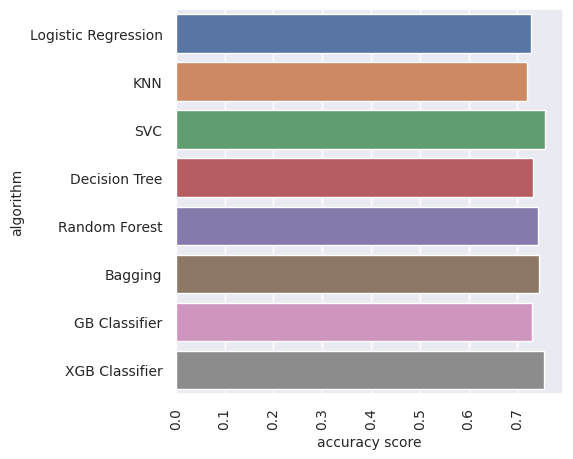

In [130]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=scores, y=algorithms)
plt.xlabel("accuracy score",fontsize=10)
plt.ylabel("algorithm",fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## **Conclusion**

### Task-1 : Data exploration insights – Sales effectiveness.
   - Exploratry Data analysis and insights are done for the given data.

### Task-2 : ML model to predict the Lead Category (High Potential ,LowPotential)

1) After data preprocessing, the data was trained and tested by different ML models.

2) Every model gave an accuracy score greater than 70%
   
3) Comparing to all methods, SVC and XGB model gives the highest accuracy score as 76% and 75% respectively.
   
  - Hence it is clear that **SVM Model** is performing very well compare to all other models predicting the lead category.